__Read the data from the file “TopRight_20230803.txt” that we have used before into a pandas dataframe. Copy the data in the “TimeStamp” and “Pressure” columns into numpy arrays called X and y. This can be done  by copying the columns into a pandas series and using numpy.array() to convert the series into an array. We will use X (the TimeStamp) as input value and y (the Pressure) as target value for an AdaBoostRegressor. Use the numpy.reshape(-1,1) to change the data in the X array into the  2D array with shape (n,1) that the regressor fit function expects for the input.__

In [1]:
import numpy as np
import pandas as pd

cw = pd.read_csv("../../Data/TopRight_20230803.txt",skiprows=7,delim_whitespace=True, names = ['Event', 'Time', 'Date', 'TimeStamp', 'ADC1', 'ADC2', 'SiPM', 'Temp', 'Pressure', 'DeadTime', 'Coincident', 'ID'])
cw


,Event,Time,Date,TimeStamp,ADC1,ADC2,SiPM,Temp,Pressure,DeadTime,Coincident,ID
0,1,0:00:07,1/1/2019,609,110.0,10.0,6.87,25.09,99976.19,95943,0,GuntherRoland
1,2,0:00:08,1/1/2019,1891,671.0,11.0,15.24,25.09,99976.70,53861,0,GuntherRoland
2,3,0:00:09,1/1/2019,2324,746.0,19.0,17.89,25.09,99977.05,1849,0,GuntherRoland
3,4,0:00:09,1/1/2019,2382,216.0,9.0,9.66,25.09,99977.05,1850,0,GuntherRoland
4,5,0:00:09,1/1/2019,2552,230.0,9.0,9.94,25.09,99977.05,49820,0,GuntherRoland
...,...,...,...,...,...,...,...,...,...,...,...,...
763296,763297,16:29:51,4/1/2019,318577118,84.0,7.0,6.21,29.72,99012.41,51798,0,GuntherRoland
763297,763298,16:29:51,4/1/2019,318577226,977.0,380.0,71.14,29.72,99012.41,1852,0,GuntherRoland
763298,763299,16:29:52,4/1/2019,318577936,226.0,7.0,9.83,29.72,99012.41,49834,0,GuntherRoland
763299,763300,16:29:53,4/1/2019,318578590,842.0,75.0,25.54,29.72,99012.41,49834,0,GuntherRoland


__Set up an AdaBoostRegressor like this: 
regr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300) 
and train the regressor using X as input and y as target (using fit()). Use the predict() function to predict a new value y2 for each X input.__


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

X = np.array(cw["TimeStamp"]).reshape(-1,1)
y = np.array(cw["Pressure"])

# set up regressor
regr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300)

# train on pressure vs time data
regr.fit(X,y)

#predict values
y2 = regr.predict(X)



__Q1: Plot original y vs X and y2 vs X as scatter plots. Do the predicted values follow the target values closely?__

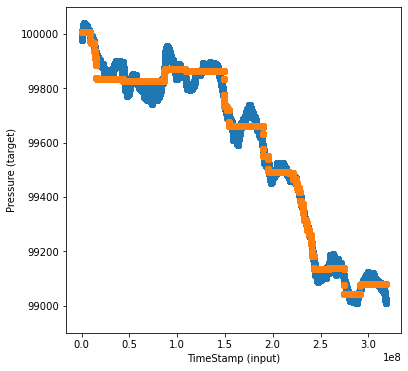

In [3]:
# plot predicted values on top of input values
plt.figure(figsize=(6,6))
plt.ylim(98900,100100)
plt.scatter(X,y)
plt.scatter(X,y2)

plt.xlabel("TimeStamp (input)")
plt.ylabel("Pressure (target)")
plt.show()

__A1: No__

__Q2: Plot the difference d between all corresponding target values y and predicted values y2. What is the shape of this distribution?__

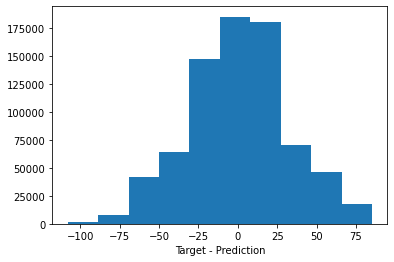

In [4]:
d = y - y2
counts, edges, blabla = plt.hist(d)
plt.xlabel("Target - Prediction")
plt.show()

__A2: Approximately Gaussian__

__Q3: What is the standard deviation?__

In [5]:
print(f"A3: The standard deviation is {np.std(d):.3}")


A3: The standard deviation is 31.6


__Q4: Increase the max_depth of the DecisionTreeRegressor to 10. Repeat the training and prediction, and replot the X vs y scatterplot and the plot of the y2 - y difference (note that the training step may take several minutes). Does the fit improve? What is the standard deviation now?__

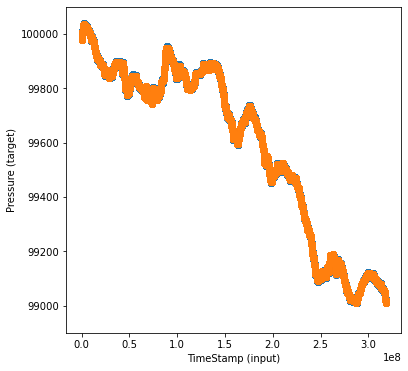

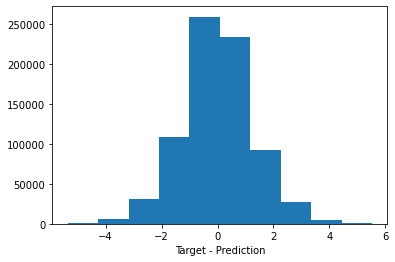

In [6]:
# set up regressor
regr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10), n_estimators=300)

# train on pressure vs time data
regr.fit(X,y)

#predict values
y2 = regr.predict(X)

# plot predicted values on top of input values
plt.figure(figsize=(6,6))
plt.ylim(98900,100100)
plt.scatter(X,y)
plt.scatter(X,y2)

plt.xlabel("TimeStamp (input)")
plt.ylabel("Pressure (target)")
plt.show()

d = y - y2
counts, edges, blabla = plt.hist(d)
plt.xlabel("Target - Prediction")
plt.show()

In [7]:
print(f"A4: The standard deviation for max_depth = 10 is {np.std(d):.3}")


A4: The standard deviation for max_depth = 10 is 1.25


__Q5: Read the file “data_HW6.txt”. This contains 20000 entries, with features x1,x2,x3 and class “sig” or “bkg”. Set up an MLP regressor like so:
mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(5, 5), max_iter=10000)
Using only feature x3, split the data set into 70% training data and 30% test data, fit the MLP regressor to the data and predict the class for each test object. Use metrics.accuracy_score() to check the accuracy of the prediction. Which accuracy do you get using only feature x3?__


<AxesSubplot:xlabel='x1', ylabel='x2'>

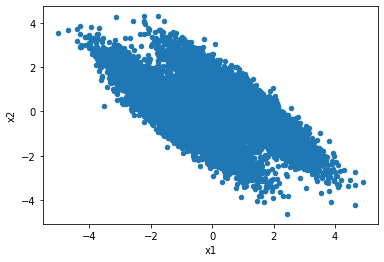

In [8]:
import pandas as pd

data = pd.read_csv("../../Data/data_HW6.txt")
s1 = data["x1"]
s2 = data["x2"]
s3 = data["x3"]
typ = data["Class"]

data.plot.scatter("x1","x2")


__Q5: Set up an MLP regressor like so: mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(5, 5), max_iter=10000) Using only feature x3, split the data set into 70% training data and 30% test data, fit the MLP regressor to the data and predict the class for each test object. Use metrics.accuracy_score() to check the accuracy of the prediction. Which accuracy do you get using only feature x3?__

In [9]:

# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
#Import scikit-learn MLP classifier
from sklearn.neural_network import MLPClassifier 


# get feature and target data for each object
x1 = np.array(data["x1"])
x2 = np.array(data["x2"])
x3 = np.array(data["x3"])

# Make 2D array containing input features
# use only feature x3:

X = np.empty((len(x1),1))
for i in range(len(x1)):
    X[i] = x3[i]

# make array containing information on object class
y = np.array(data["Class"])


# Split dataset into training set (70%) and test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create MLP classifer object with 2 hidden layers with 5 perceptrons each
mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(5, 5), max_iter=10000)

# Train MLP Classifer
model = mlp.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print(f"A5: Accuracy is {metrics.accuracy_score(y_test, y_pred):.3}")

A5: Accuracy is 0.507


__Q6: Now use all 3 features x1, x2, x3 and retrain the same regressor. Does the classification improve? What is the accuracy now?__

In [10]:
# Make 2D array containing input features
# use all features x1,x2,x3:

X = np.empty((len(x1),3))
for i in range(len(x1)):
    X[i] = [x1[i],x2[i],x3[i]]

# make array containing information on object class
y = np.array(data["Class"])


# Split dataset into training set (70%) and test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create MLP classifer object with 2 hidden layers with 5 perceptrons each
mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(5, 5), max_iter=10000)

# Train MLP Classifer
model = mlp.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print(f"A5: Accuracy is {metrics.accuracy_score(y_test, y_pred):.3}")

A5: Accuracy is 0.997
